<a href="https://colab.research.google.com/github/Sparkashok/Machine-Learning/blob/main/ML_K_meansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Average distance for K=2: 4.69614595933035
Average distance for K=3: 2.4282899475018183
Average distance for K=4: 1.5607296944256301
Average distance for K=5: 1.2161330605938225


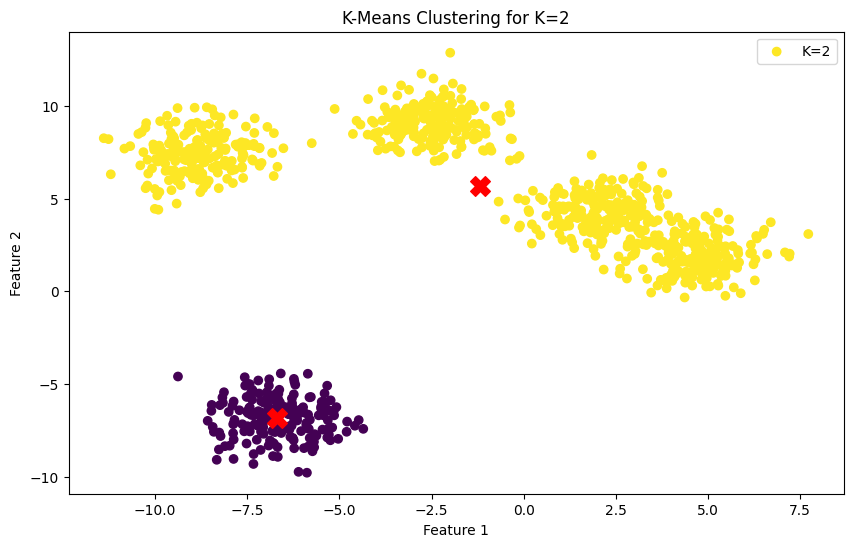

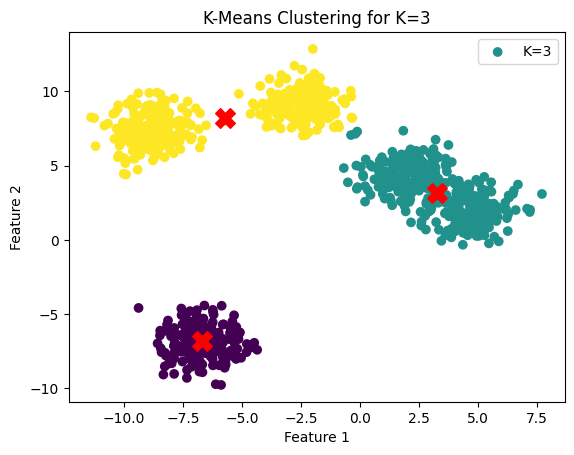

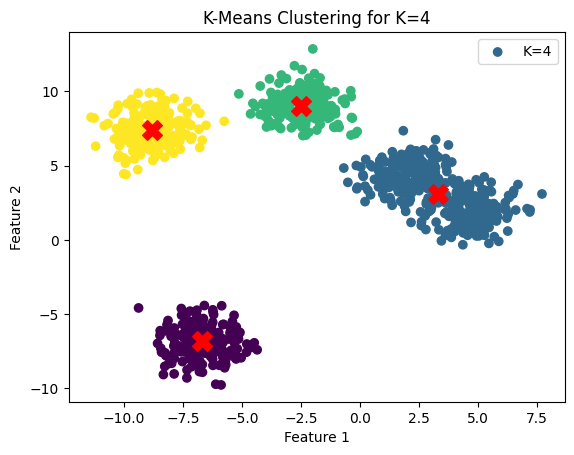

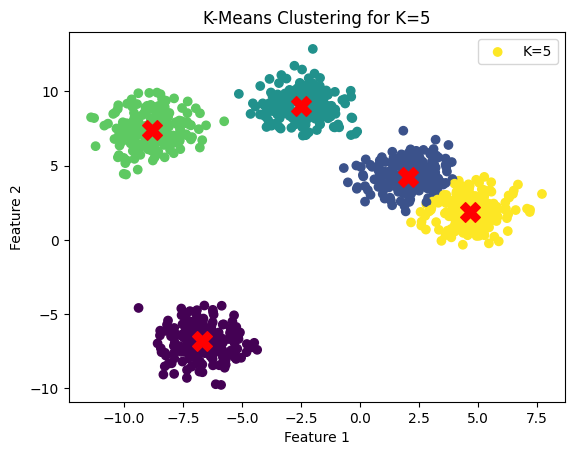

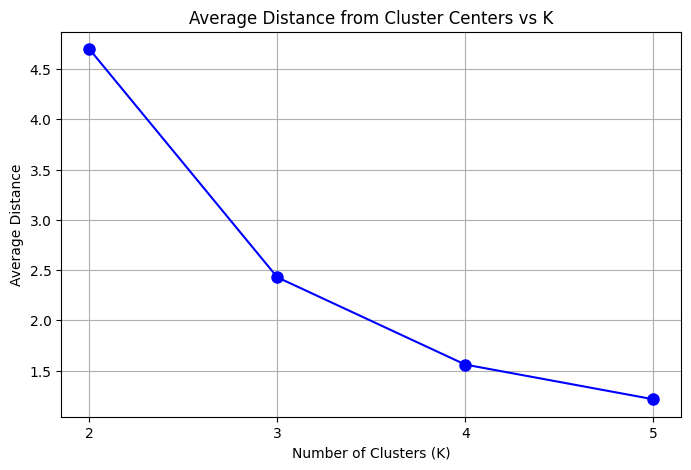

In [2]:
# Step 1: Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin_min

# Step 2: Create synthetic data using make_blobs
# Create a dataset with 1000 samples and 2 features
X, _ = make_blobs(n_samples=1000, centers=5, random_state=42)

# Step 3: Function to calculate average distance from cluster centers
def calculate_avg_distance(X, kmeans):
    # Find the cluster centroids
    centers = kmeans.cluster_centers_
    # Find the closest point to each centroid
    closest, _ = pairwise_distances_argmin_min(X, centers)
    # Calculate the average distance from each point to its centroid
    avg_distance = np.mean(np.linalg.norm(X - centers[closest], axis=1))
    return avg_distance

# Step 4: Perform K-means clustering for different values of K (2, 3, 4, 5)
K_values = [2, 3, 4, 5]
avg_distances = []

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)
    avg_distance = calculate_avg_distance(X, kmeans)
    avg_distances.append(avg_distance)
    print(f'Average distance for K={K}: {avg_distance}')

# Step 5: Visualize the clusters and performance evaluation
plt.figure(figsize=(10, 6))

# Plotting K-means clustering results for different K values
for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(X)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', label=f'K={K}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
    plt.title(f'K-Means Clustering for K={K}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='best')
    plt.show()

# Plot the average distance for each K
plt.figure(figsize=(8, 5))
plt.plot(K_values, avg_distances, marker='o', color='b', linestyle='-', markersize=8)
plt.title('Average Distance from Cluster Centers vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Distance')
plt.xticks(K_values)
plt.grid(True)
plt.show()
